In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,  LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
%matplotlib inline

In [126]:
#loading dataset and checking it out

wine_df = pd.read_csv("http://bit.ly/wine_quality_red")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [127]:
#information about dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Distribution of Variables with respect to  quality (output)**

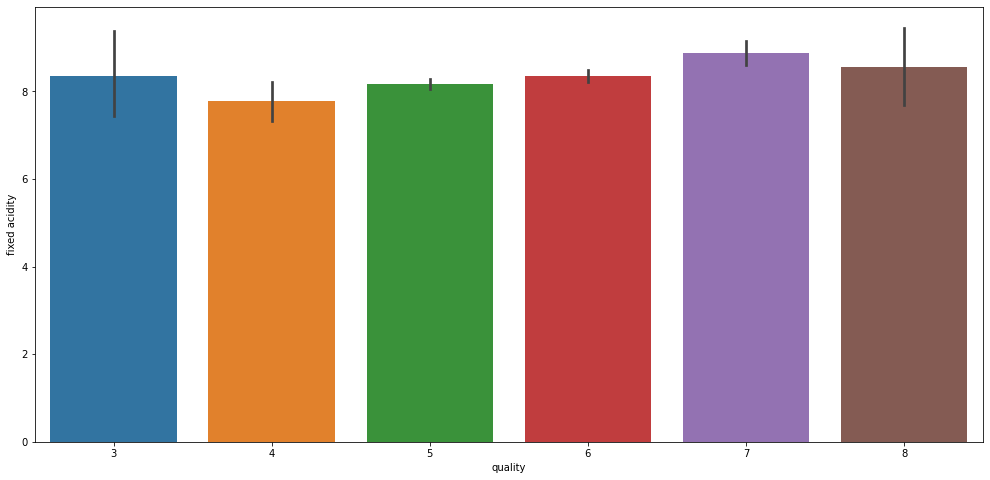

In [128]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='fixed acidity', data=wine_df );

### **Here it is clear that for any value of quality, the fixed acidity remains more or less the same. This would mean that fixed acidity is more or less constant over the quality variation, or in other words, it is independent of quality. Hence even if we remove the variable, it isn't going to affect the quality.**

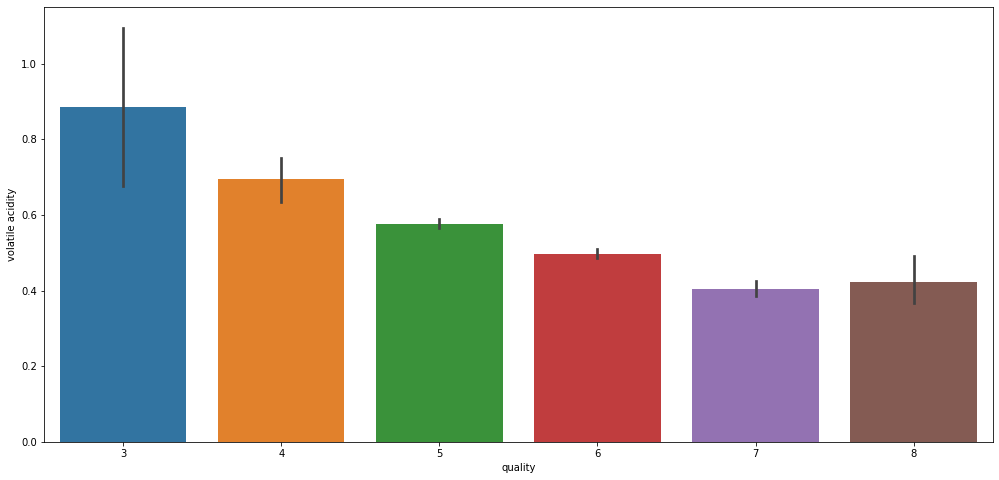

In [129]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='volatile acidity', data=wine_df );

### **Here it is clear that as value of volatile acidity decreases, the quality increases**

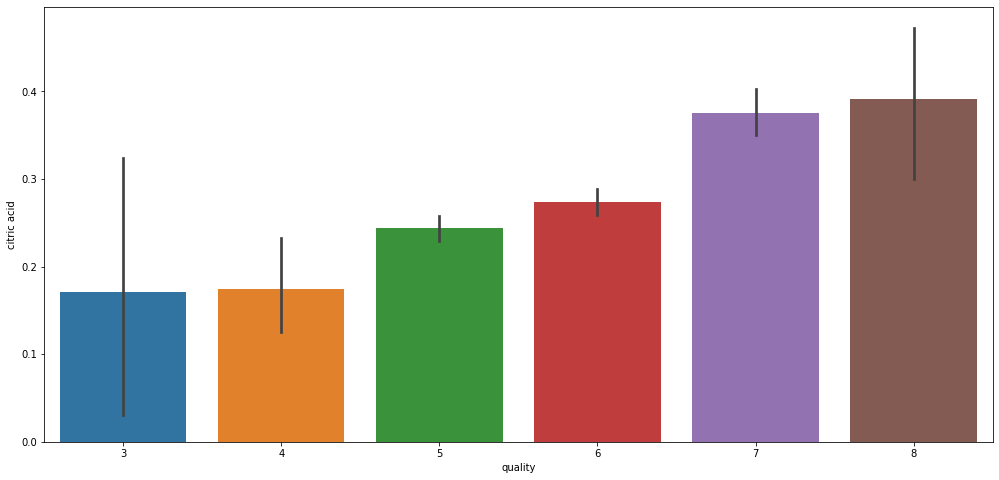

In [130]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='citric acid', data=wine_df );

### **Here it is clear that as value of citric acid increases, the quality increases**

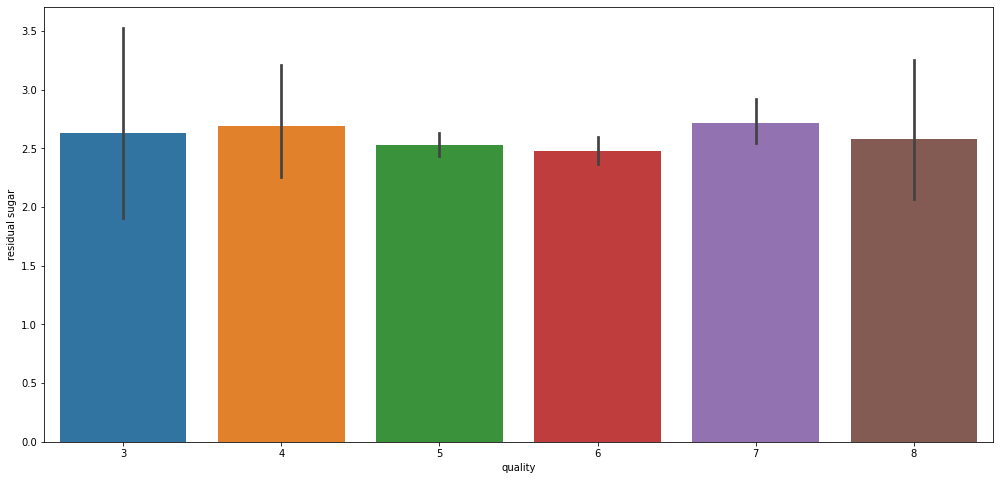

In [131]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='residual sugar', data=wine_df );

### **Here it is clear that for any value of quality, the residual sugar remains more or less the same. This would mean that residual sugar is more or less constant over the quality variation, or in other words, it is independent of quality. Hence even if we remove the variable, residual sugar, it isn't going to affect the quality.**

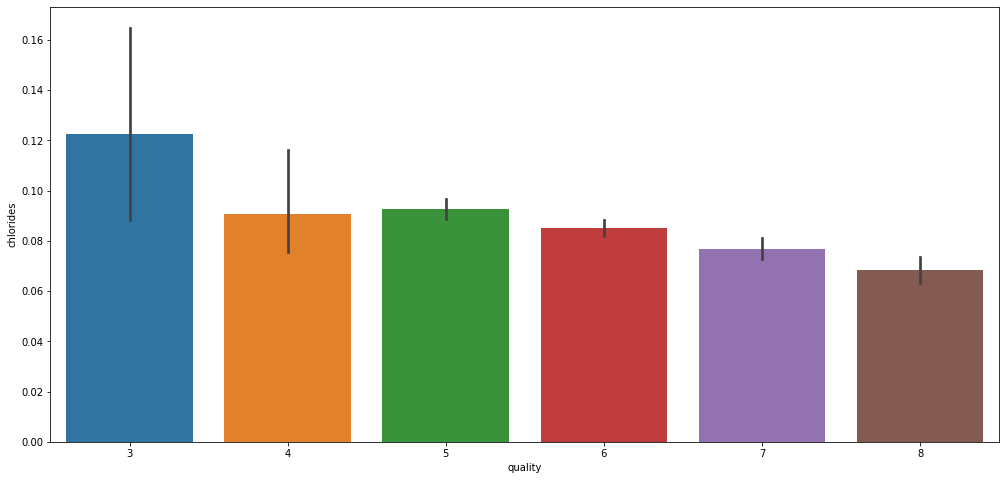

In [132]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='chlorides', data=wine_df );

### **Here it is clear that as value of chlorides decreases, the quality increases**

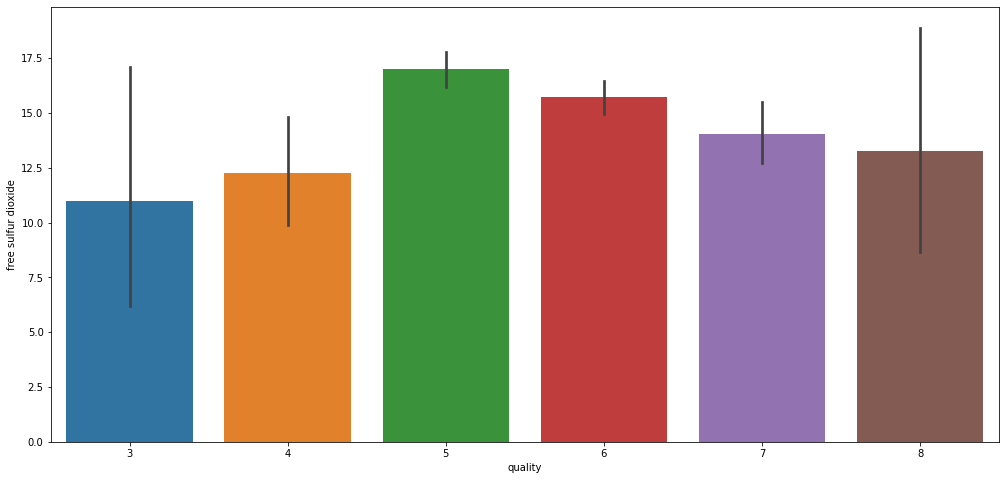

In [133]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_df );

### **Here the relation of  free sulphur dioxide is not linear with quality. Initially free sulphur dioxide seems to have a positive relation upto around the value of 13. But beyond that the relation becomes inverse, and as the free suphur dioxide value increases the wine quality falls to 5.**

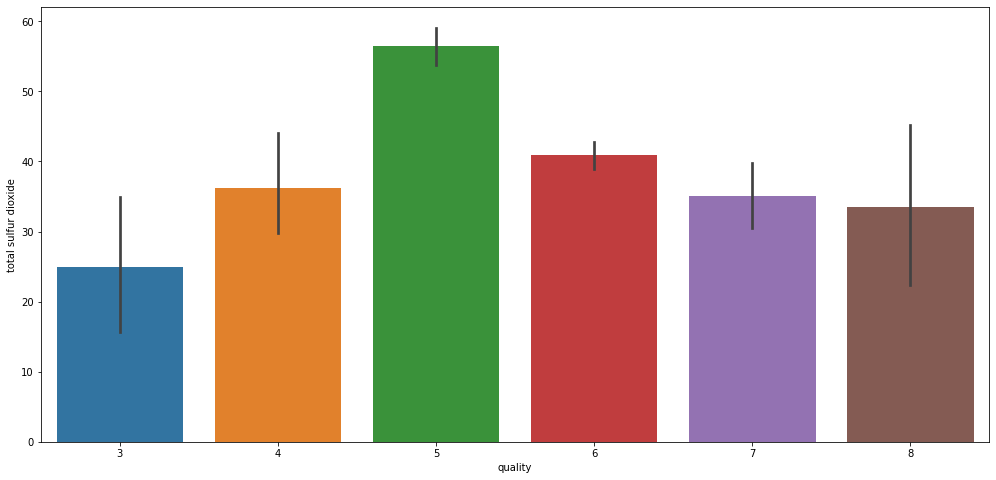

In [134]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_df );

### **Here the relation of total sulfur dioxide is not linear with quality. Initially total sulfur dioxide seems to have a positive relation upto around the value of 32 at which it has the best quality. But beyond that the relation becomes inverse, and as the total sulfur dioxide value increases, quality quickly falls to a low quality of four for around a value of 37. Beyond that the quality slighly improves to 6 around 40 and then falls again to a value of 5 as total sulfur dioxide value increases.**

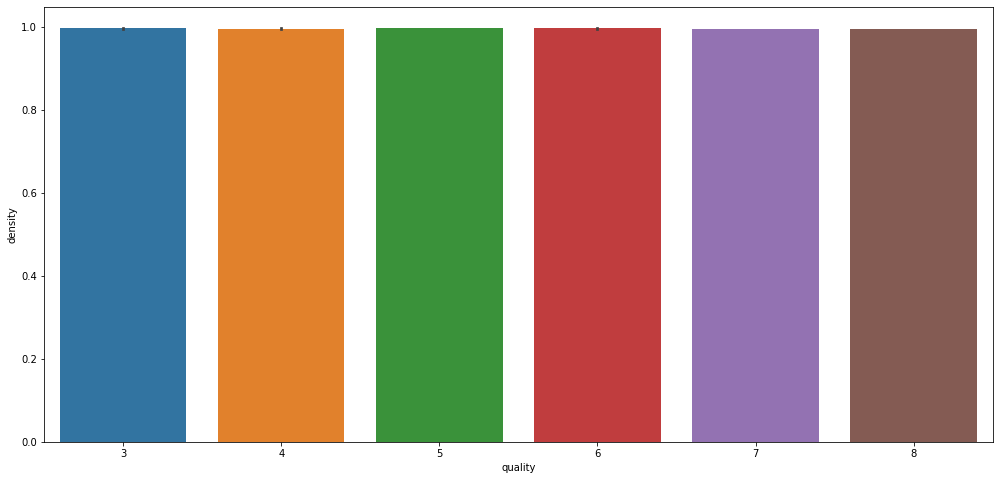

In [135]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='density', data=wine_df );

### **Here it is clear that for any value of quality, the density remains the same. This would mean that density is more or less constant over the quality variation, or in other words, it is independent of quality. Hence even if we remove the variable, it isn't going to affect the quality.**

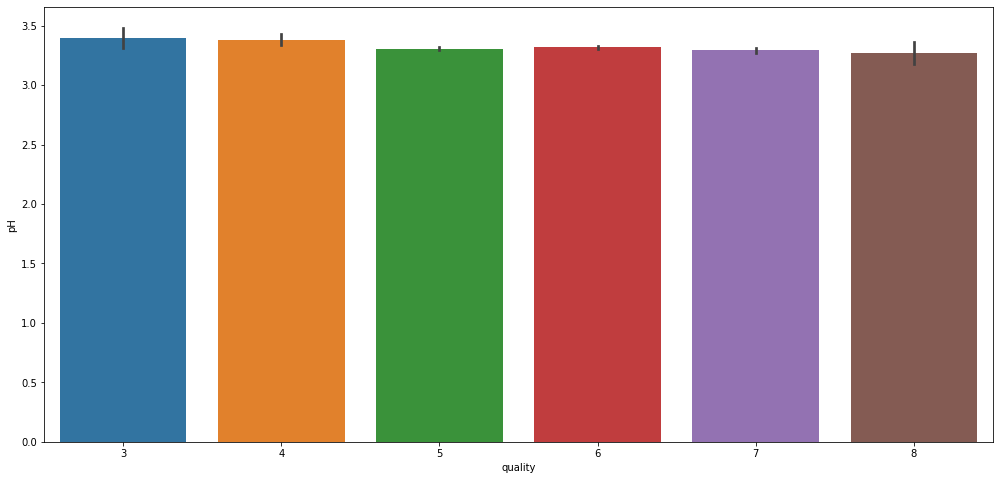

In [136]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='pH', data=wine_df );

### **Here it is clear that for any value of quality, the pH remains the same. This would mean that pH is more or less constant over the quality variation, or in other words, it is independent of quality. Hence even if we remove the variable, it isn't going to affect the quality.**

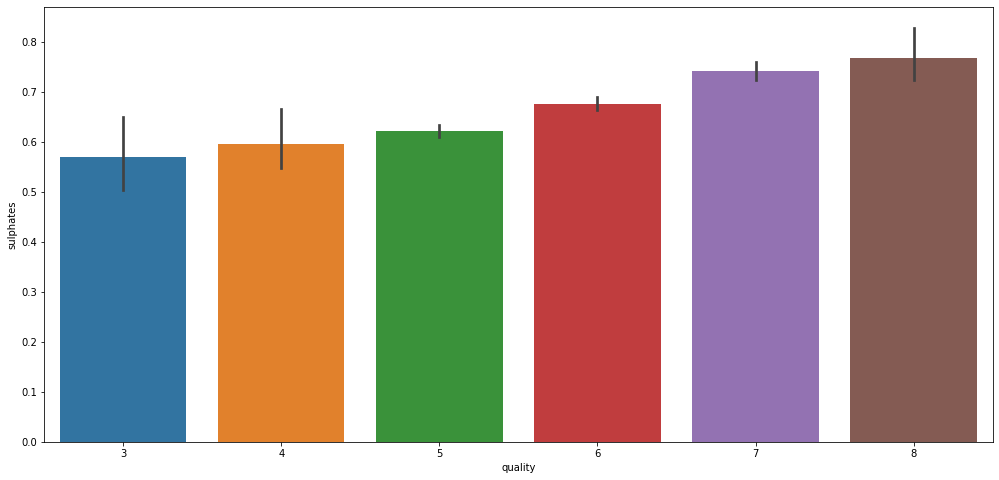

In [137]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='sulphates', data=wine_df );

### **Here it is clear that as value of sulphates increases, the quality increases**

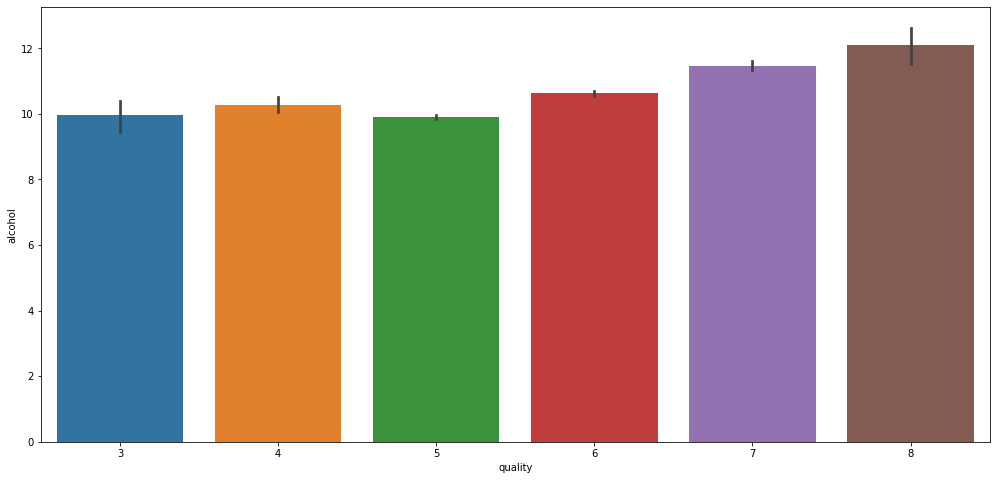

In [138]:
fig=plt.figure(figsize =(17,8))
sns.barplot(x='quality', y='alcohol', data=wine_df );

### **Here it is clear that as value of alchohol increases beyond a value of 10, the quality increases**

In [139]:
corr_matrix = wine_df.corr()
corr_matrix['quality'].sort_values(ascending =False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [140]:
#making binary classification for the output
#dividing wine as good or bad by setting a quality limit of 6.5. For all values above 6.5 the wine is termed good and for all values below it, it is termed bad.

bins =(2,6.5,8) 
#here, the first number 2 stands for how many bins we want (bad, good).
#Then we first give the bin edge for bad, meaning upto what point should we call wine bad. Since we decided it is 6.5, we give that value.
#Then we give the bin edge for good, which is 8. Although it may seem it is not required, it is becuase we have to define the bin edge for every bin we want.

group_names =['bad','good']
#Since as the value increases, the quality changes from bad to good, we have to name groups also in the same order

wine_df['quality'] = pd.cut(wine_df['quality'].astype(float), bins=bins, labels =group_names)
wine_df['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

bad     1382
good     217
Name: quality, dtype: int64


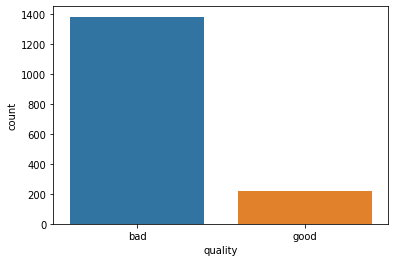

In [141]:
print(wine_df['quality'].value_counts())
sns.countplot( x=wine_df['quality']);
#sns countplot can be thought of as histogram across categorical data.

In [142]:
label_quality = LabelEncoder()
# For an n class output variable, LabelEncoder encodes the  target variable with values from 0 to n-1.
# Here, label_quality is an object of LabelEncoder class.
# We use this object to fit_transform the output variable from categorical to numerical variable.

In [143]:
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])
# Bad became 0 and Good became 1
wine_df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

0    1382
1     217
Name: quality, dtype: int64


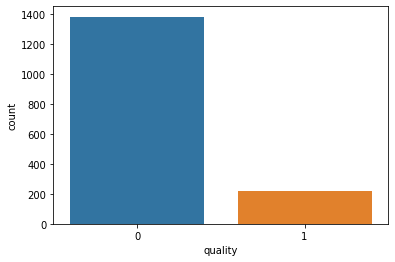

In [144]:
print(wine_df['quality'].value_counts())
sns.countplot( x=wine_df['quality']);


#### **there are 1382 entries as 0 (Bad) and 217 entries as 1 (Good) which cross checks.**

In [145]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [146]:
# Now we split the dataset into input variables X and output variable y
X =wine_df[[ 'volatile acidity', 'citric acid','residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide',
          'sulphates', 'alcohol']].copy()
y=wine_df['quality']
X

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2


In [147]:
#Now we split the X variable as well as y variable in training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state =42)
y_train

493     0
354     0
342     0
834     0
705     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: quality, Length: 1279, dtype: int64

In [148]:
# Applying standad scaler to standardize the variables
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Now, we are going to evaluate the performance of various models to select the most suitable.** 


#### **In a classification problem, if the accuracies and f1_scores are comparable, the metric we choose is dependent on the business objective.We optimize either for precision or recall depending on the nature of positive.** 

If **1 means having a better condition than 0**, as in this case of wine quality, or part of machinery being good, it is **better to optimize for precision** since, when in doubt, it is better to reject than accept **(more false negative than false positive)** to ensure the quality, meaning it is better to reject a good part as not, than fitting a faulty part in a machinery which may cause loss of quality, thereby trust and even life.

If **1 means having a worse condition than 0**, as in this case of 1 meaning confirmation of disease or fraud, it is **better to optimize for recall** since, when in doubt, it is better to  accept than reject **(more false positive than false negative)** to ensure safety, meaning, it is better to predict a disease or fraud when it is not there than to leave it undetected.

### Since we are having 1 as a better condition than 0, **we are aiming for better precision, when the accuracies and f1_scores are comparable**

# **NULL ACCURACY**

 **It means the accuracy of a dumb machine which predicts the most dominant class output, no matter what the input is. Here in the output we have 1s and 0s, out of which the more dominant class is 0. What if the machine only outputs 0 for whatever be the input? what will be the accuracy? that is given by null accuracy.** 

 **Although on its own it is not much useful, when this value is compared with the accuracy score of the model, we'll get an idea as to how good our model is.**

In [149]:
# finding out class distribution 
y_test.value_counts()

0    273
1     47
Name: quality, dtype: int64

In [150]:
# select the class with highest value count which is the first entry
y_test.value_counts().head(1)

0    273
Name: quality, dtype: int64

In [151]:
# converting the first entry into percentage by dividing by the total entries. This is still pandas series 
y_test.value_counts().head(1)/len(y_test)

0    0.853125
Name: quality, dtype: float64

In [152]:
# converting the pandas series  into numpy array 
(y_test.value_counts().head(1)/len(y_test)).values

array([0.853125])

In [153]:
#choosing the entry in the numpy array by indexing
(y_test.value_counts().head(1)/len(y_test)).values[0]

0.853125

In [154]:
#Logistic Regression

from sklearn.linear_model import  LogisticRegression

clf =LogisticRegression(random_state=2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_prob =clf.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy score:', accuracy_score(y_test, y_pred))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test, y_pred))
print('recall score:', recall_score(y_test, y_pred))
print('f1 score:', f1_score(y_test, y_pred, average ='macro')) # when there is class imbalance, better to choose macro
print('AUC:', roc_auc_score(y_test, y_pred_prob))


[[266   7]
 [ 33  14]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.67      0.30      0.41        47

    accuracy                           0.88       320
   macro avg       0.78      0.64      0.67       320
weighted avg       0.86      0.88      0.85       320

accuracy score: 0.875
null accuracy score: 0.853125
precision score: 0.6666666666666666
recall score: 0.2978723404255319
f1 score: 0.6709173179761415
AUC: 0.884030862754267


**We can see that although the accuracy is 88%, the null accuracy is 85%. This gives us a context and we can say that it doesn't have a good accuracy because even a dumb machine could have an accuracy of 85%. But if we had not compared it with null accuracy, we would have thought it is a good accuracy score. Precisely for this reason, we calculate null accuracy score.**

In [155]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf2=DecisionTreeClassifier(random_state =42,)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
y_pred_prob2 =clf2.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))
print('accuracy score:', accuracy_score(y_test, y_pred2))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test, y_pred2))
print('recall score:', recall_score(y_test, y_pred2))
print('f1 score:', f1_score(y_test, y_pred2, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob2))



[[260  13]
 [ 23  24]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.65      0.51      0.57        47

    accuracy                           0.89       320
   macro avg       0.78      0.73      0.75       320
weighted avg       0.88      0.89      0.88       320

accuracy score: 0.8875
null accuracy score: 0.853125
precision score: 0.6486486486486487
recall score: 0.5106382978723404
f1 score: 0.7533401849948613
AUC: 0.7315096251266463


0.7546177227028292


Text(0, 0.5, ' AUC')

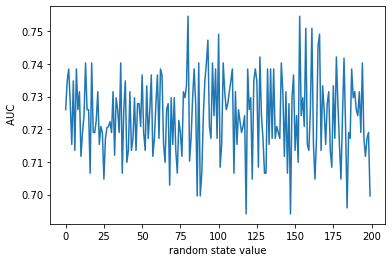

In [156]:
rs_range1 =range(0,200)
rs_score1 =[]
for r in rs_range1:
  clf8=DecisionTreeClassifier(random_state =r,)
  clf8.fit(X_train,y_train)
  y_pred8 = clf8.predict(X_test)
  y_pred_prob8 =clf8.predict_proba(X_test)[:,1]
  rs_score1.append(roc_auc_score(y_test, y_pred_prob8).tolist())

#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(rs_score1))
plt.plot(rs_range1,rs_score1)
plt.xlabel('random state value')
plt.ylabel(' AUC')


In [157]:
lst0=[]
for k in (rs_score1):
  lst0.append(k)

largest0 =max(lst0)
all_indexes0 = [g for g, x in enumerate(lst0) if x == largest0]
print(all_indexes0, largest0)

#actual value to be taken is first entry +first value of range 

[80, 153] 0.7546177227028292


**random_state = 80+ 0(first value of range) = 80**

0.8644688644688645


Text(0, 0.5, ' AUC')

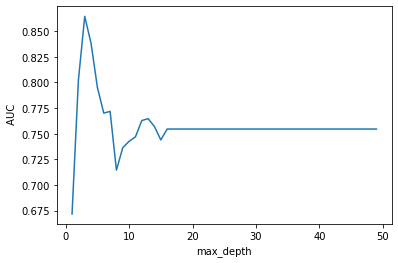

In [158]:
rs_range11 =range(1,50)
rs_score11 =[]
for m in rs_range11:
  clf81=DecisionTreeClassifier(random_state =80,max_depth=m)
  clf81.fit(X_train,y_train)
  y_pred81 = clf81.predict(X_test)
  y_pred_prob81 =clf81.predict_proba(X_test)[:,1]
  rs_score11.append(roc_auc_score(y_test, y_pred_prob81).tolist())

#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(rs_score11))
plt.plot(rs_range11,rs_score11)
plt.xlabel('max_depth')
plt.ylabel(' AUC')



In [159]:
lst11=[]
for k in (rs_score11):
  lst11.append(k)

largest11 =max(lst11)
all_indexes11 = [g for g, x in enumerate(lst11) if x == largest11]
print(all_indexes11, largest11)

#actual value to be taken is first entry +first value of range 

[2] 0.8644688644688645


**max_depth = 2+ 1(first value of range) = 3**

In [160]:
clf21=DecisionTreeClassifier(random_state =80,max_depth=3)
clf21.fit(X_train,y_train)
y_pred21 = clf21.predict(X_test)
y_pred_prob21 =clf21.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred21))
print(classification_report(y_test,y_pred21))
print('accuracy score:', accuracy_score(y_test, y_pred21))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test, y_pred21))
print('recall score:', recall_score(y_test, y_pred21))
print('f1 score:', f1_score(y_test, y_pred21, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob21))

[[264   9]
 [ 36  11]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320

accuracy score: 0.859375
null accuracy score: 0.853125
precision score: 0.55
recall score: 0.23404255319148937
f1 score: 0.6249120887708057
AUC: 0.8644688644688645


0.875


Text(0, 0.5, ' accuracy')

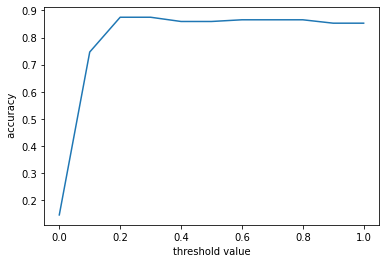

In [161]:
from sklearn.preprocessing import binarize

t_range1 =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
t_score1 =[]

for t in t_range1:
  y_pred_class21= binarize(y_pred_prob21.reshape(-1, 1),t)
  t_score1.append(accuracy_score(y_test, y_pred_class21).tolist())


#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(t_score1))
plt.plot(t_range1,t_score1)
plt.xlabel('threshold value')
plt.ylabel(' accuracy')

In [162]:
#Decision Tree -best model

clf22=DecisionTreeClassifier(random_state =153,max_depth=3)
clf22.fit(X_train,y_train)
y_pred22 = clf22.predict(X_test)
y_pred_prob22 =clf22.predict_proba(X_test)[:,1]
y_pred_class22 = binarize(y_pred_prob22.reshape(-1, 1),0.2)
print(confusion_matrix(y_test,y_pred_class22))
print(classification_report(y_test,y_pred_class22))
print('accuracy score:', (accuracy_score(y_test, y_pred_class22)))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test,y_pred_class22))
print('recall score:', recall_score(y_test, y_pred_class22))
print('f1 score:', f1_score(y_test, y_pred_class22, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob22))

[[252  21]
 [ 19  28]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       273
           1       0.57      0.60      0.58        47

    accuracy                           0.88       320
   macro avg       0.75      0.76      0.75       320
weighted avg       0.88      0.88      0.88       320

accuracy score: 0.875
null accuracy score: 0.853125
precision score: 0.5714285714285714
recall score: 0.5957446808510638
f1 score: 0.7549019607843137
AUC: 0.8644688644688645


**We can see that the best model of decision tree performs worse than Logistic Regression model which had both accuracy as well as AUC as 0.88.**

Thus we move on to Random Forest.

In [163]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

clf3=RandomForestClassifier(random_state =42)
clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)
y_pred_prob3 =clf3.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print('accuracy score:', (accuracy_score(y_test, y_pred3)))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test, y_pred3))
print('recall score:', recall_score(y_test, y_pred3))
print('f1 score:', f1_score(y_test, y_pred3, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob3))


[[266   7]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.78      0.53      0.63        47

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

accuracy score: 0.909375
null accuracy score: 0.853125
precision score: 0.78125
recall score: 0.5319148936170213
f1 score: 0.790608993885241
AUC: 0.9427168576104746


0.9463408931494038


Text(0, 0.5, ' AUC')

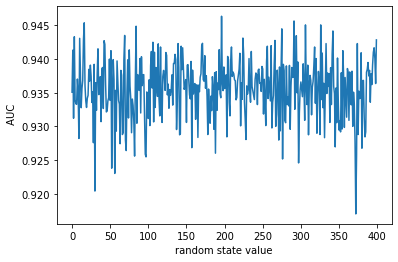

In [164]:
rs_range2 =range(0,400)
rs_score2 =[]
for r in rs_range2:
  clf9=RandomForestClassifier(random_state =r,)
  clf9.fit(X_train,y_train)
  y_pred9 = clf9.predict(X_test)
  y_pred_prob9 =clf9.predict_proba(X_test)[:,1]
  rs_score2.append(roc_auc_score(y_test, y_pred_prob9).tolist())


#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(rs_score2))
plt.plot(rs_range2,rs_score2)
plt.xlabel('random state value')
plt.ylabel(' AUC')

In [165]:

lst1=[]
for k in (rs_score2):
  lst1.append(k)

largest1 =max(lst1)
all_indexes1 = [g for g, x in enumerate(lst1) if x == largest1]
print(all_indexes1, largest1)

#actual value to be taken is first entry +first value of range 

[196] 0.9463408931494038


**random_state = 196+ 0 (first value of range) = 196**

0.9470423193827449


Text(0, 0.5, ' AUC')

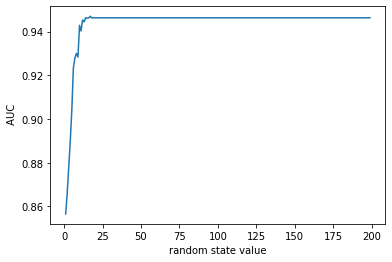

In [166]:
md_range1 =range(1,200)
md_score1 =[]
for d in md_range1:
  clf10=RandomForestClassifier(random_state =196, max_depth=d)
  clf10.fit(X_train,y_train)
  y_pred10 = clf10.predict(X_test)
  y_pred_prob10 =clf10.predict_proba(X_test)[:,1]
  md_score1.append(roc_auc_score(y_test, y_pred_prob10).tolist())
  


#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(md_score1))
plt.plot(md_range1,md_score1)
plt.xlabel('random state value')
plt.ylabel(' AUC')

In [167]:
lst2=[]
for k in (md_score1):
  lst2.append(k)


largest2 =max(lst2)
all_indexes2 = [g for g, x in enumerate(lst2) if x == largest2]
print(all_indexes2, largest2)
#actual value to be taken is first entry +first value of range 

[16] 0.9470423193827449


**max_depth = 16+ 1 (first value of range) = 17**

0.9530823786142935


Text(0, 0.5, ' AUC')

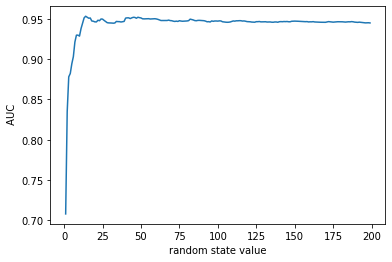

In [168]:
ne_range1 =range(1,200)
ne_score1 =[]
for n in ne_range1:
  clf11=RandomForestClassifier(random_state =196, max_depth=17, n_estimators=n)
  clf11.fit(X_train,y_train)
  y_pred11 = clf11.predict(X_test)
  y_pred_prob11 =clf11.predict_proba(X_test)[:,1]
  ne_score1.append(roc_auc_score(y_test, y_pred_prob11).tolist())
  


#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(ne_score1))
plt.plot(ne_range1,ne_score1)
plt.xlabel('random state value')
plt.ylabel(' AUC')

In [169]:
lst3=[]
for k in (ne_score1):
  lst3.append(k)
  
largest3 =max(lst3)
all_indexes3 = [g for g, x in enumerate(lst3) if x == largest3]
print(all_indexes3,largest3)


#actual value to be taken is first entry +first value of range

[13] 0.9530823786142935


**n_estimators = 13+ 1 (first value of range) = 14**

In [170]:
#model 2-Random Forest

clf4=RandomForestClassifier(random_state =196,max_depth =17,n_estimators=14,min_samples_leaf=1,max_leaf_nodes=None)
clf4.fit(X_train,y_train)
y_pred4 = clf4.predict(X_test)
y_pred_prob4 =clf4.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print('accuracy score:', (accuracy_score(y_test, y_pred4)))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test, y_pred4))
print('recall score:', recall_score(y_test, y_pred4))
print('f1 score:', f1_score(y_test, y_pred4, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob4))


[[267   6]
 [ 24  23]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.79      0.49      0.61        47

    accuracy                           0.91       320
   macro avg       0.86      0.73      0.78       320
weighted avg       0.90      0.91      0.90       320

accuracy score: 0.90625
null accuracy score: 0.853125
precision score: 0.7931034482758621
recall score: 0.48936170212765956
f1 score: 0.7760358342665173
AUC: 0.9530823786142935


0.9125


Text(0, 0.5, ' accuracy')

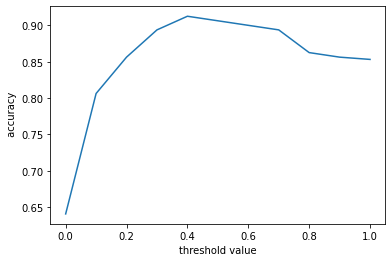

In [171]:
from sklearn.preprocessing import binarize

t_range =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
t_score =[]

for t in t_range:
  y_pred_class = binarize(y_pred_prob4.reshape(-1, 1),t)
  t_score.append(accuracy_score(y_test, y_pred_class).tolist())


#plot the value of  random_state value (x_axis) vs accuracy (y-axis)
print(max(t_score))
plt.plot(t_range,t_score)
plt.xlabel('threshold value')
plt.ylabel(' accuracy')

In [172]:

lst5=[]
for k in (t_score):
  lst5.append(k)
  
largest5 =max(lst5)
all_indexes5 = [g for g, x in enumerate(lst5) if x == largest5]
print(all_indexes5,largest5)

[4] 0.9125


In [173]:
y_pred_class1 = binarize(y_pred_prob4.reshape(-1, 1),0.4)
print(accuracy_score(y_test, y_pred_class1))

0.9125


In [174]:
#Finalized model -Random Forest 1.1

clf5=RandomForestClassifier(random_state =196,max_depth =17,n_estimators=13,min_samples_leaf=1,max_leaf_nodes=None)
clf5.fit(X_train,y_train)
y_pred5 = clf5.predict(X_test)
y_pred_prob5 =clf5.predict_proba(X_test)[:,1]
y_pred_class2 = binarize(y_pred_prob5.reshape(-1, 1),0.4)
print(confusion_matrix(y_test,y_pred_class2))
print(classification_report(y_test,y_pred_class2))
print('accuracy score:', (accuracy_score(y_test, y_pred_class2)))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test,y_pred_class2))
print('recall score:', recall_score(y_test, y_pred_class2))
print('f1 score:', f1_score(y_test, y_pred_class2, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob5))

[[265   8]
 [ 18  29]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       273
           1       0.78      0.62      0.69        47

    accuracy                           0.92       320
   macro avg       0.86      0.79      0.82       320
weighted avg       0.91      0.92      0.91       320

accuracy score: 0.91875
null accuracy score: 0.853125
precision score: 0.7837837837837838
recall score: 0.6170212765957447
f1 score: 0.8218568002740665
AUC: 0.9510560361624192


In [175]:
#Finalized model -Random Forest 1.2

clf5=RandomForestClassifier(random_state =196,max_depth =17,n_estimators=14,min_samples_leaf=1,max_leaf_nodes=None)
clf5.fit(X_train,y_train)
y_pred5 = clf5.predict(X_test)
y_pred_prob5 =clf5.predict_proba(X_test)[:,1]
y_pred_class2 = binarize(y_pred_prob5.reshape(-1, 1),0.4)
print(confusion_matrix(y_test,y_pred_class2))
print(classification_report(y_test,y_pred_class2))
print('accuracy score:', (accuracy_score(y_test, y_pred_class2)))
print('null accuracy score:', (y_test.value_counts().head(1)/len(y_test)).values[0])
print('precision score:', precision_score(y_test,y_pred_class2))
print('recall score:', recall_score(y_test, y_pred_class2))
print('f1 score:', f1_score(y_test, y_pred_class2, average ='macro'))
print('AUC:', roc_auc_score(y_test, y_pred_prob5))

[[262  11]
 [ 17  30]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1       0.73      0.64      0.68        47

    accuracy                           0.91       320
   macro avg       0.84      0.80      0.82       320
weighted avg       0.91      0.91      0.91       320

accuracy score: 0.9125
null accuracy score: 0.853125
precision score: 0.7317073170731707
recall score: 0.6382978723404256
f1 score: 0.8155467720685112
AUC: 0.9530823786142935


# **CONCLUDING WORDS:**

Finalized model 1.1 and 1.2 have slight variations in accuracy and AUC. 

**When comparing, Model 1.1 has higher accuracy among the two, while model 1.2 has higher AUC among the two.**

But since the **output class is highly imbalanced**, a **better judge of classifier performance is AUC than accuracy.**

### **Hence finalized model is model 1.2**